In [ ]:
!pip install xgboost imbalanced-learn tensorflow

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("dataset_binary.csv")

print("Shape:", df.shape)
df.head()

Shape: (253680, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



Columns:
 Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Missing Values:
 Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Target Distribution:
 Diabetes_binary
0.0    218

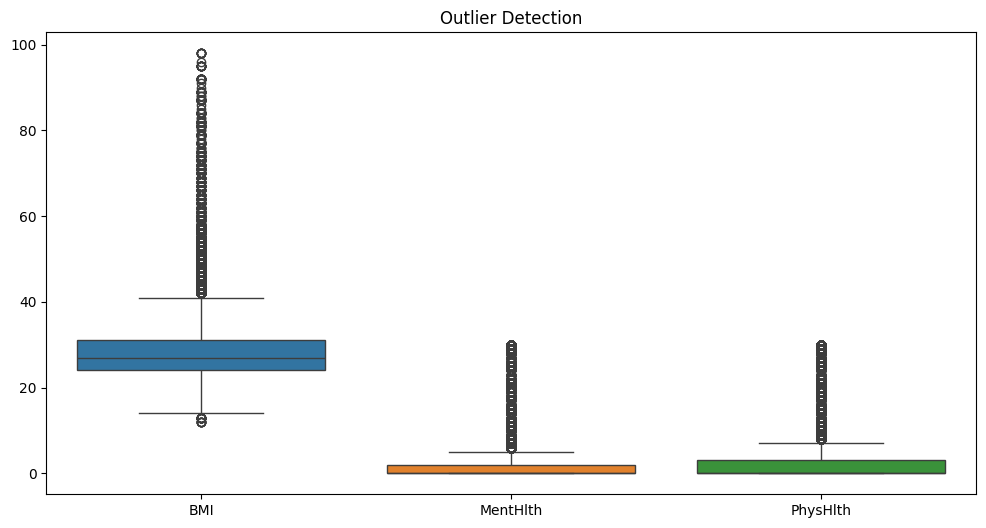

In [ ]:
print("\nColumns:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget Distribution:\n", df["Diabetes_binary"].value_counts())

cols = ["BMI", "MentHlth", "PhysHlth"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols])
plt.title("Outlier Detection")
plt.show()

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


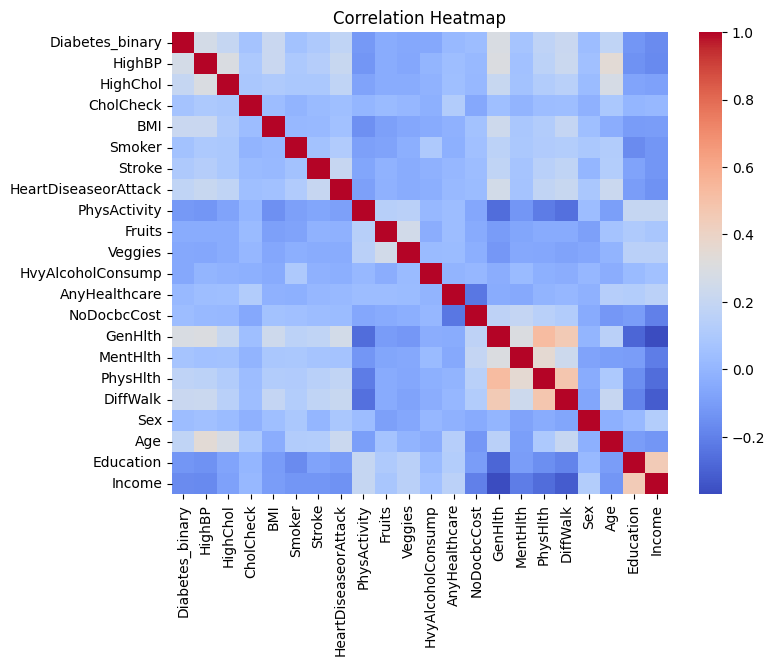

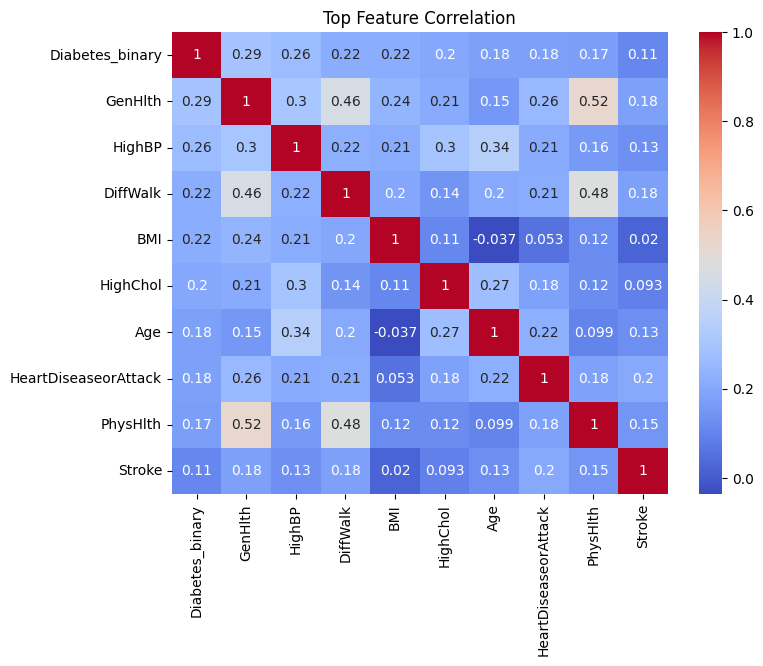

In [ ]:
correlation = df.corr(numeric_only=True)["Diabetes_binary"].sort_values(ascending=False)
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

top_features = correlation.index[:10]

plt.figure(figsize=(8, 6))
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Top Feature Correlation")
plt.show()

In [ ]:
df = df.drop(columns=["Stroke", "HeartDiseaseorAttack"], errors='ignore')
df.drop_duplicates(inplace=True)

X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Save original
X_train_orig = X_train.copy()
y_train_orig = y_train.copy()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_orig, y_train_orig)

print("After SMOTE:", pd.Series(y_train_sm).value_counts(normalize=True))

After SMOTE: Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [ ]:
# SMOTE scaling
scaler_sm = StandardScaler()
X_train_sm = scaler_sm.fit_transform(X_train_sm)
X_test_sm = scaler_sm.transform(X_test)

# Original scaling
scaler_orig = StandardScaler()
X_train_orig = scaler_orig.fit_transform(X_train_orig)
X_test_orig = scaler_orig.transform(X_test)

In [ ]:
# With SMOTE
lr_sm = LogisticRegression(max_iter=1000)
lr_sm.fit(X_train_sm, y_train_sm)
y_pred_lr_sm = lr_sm.predict(X_test_sm)

# Without SMOTE
lr_orig = LogisticRegression(max_iter=1000)
lr_orig.fit(X_train_orig, y_train_orig)
y_pred_lr_orig = lr_orig.predict(X_test_orig)

In [ ]:
# With SMOTE
xgb_sm = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_sm.fit(X_train_sm, y_train_sm)

y_pred_xgb_sm = (xgb_sm.predict_proba(X_test_sm)[:,1] > 0.4).astype(int)

# Without SMOTE
xgb_orig = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_orig.fit(X_train_orig, y_train_orig)

y_pred_xgb_orig = (xgb_orig.predict_proba(X_test_orig)[:,1] > 0.4).astype(int)

In [ ]:
# With SMOTE
rf_sm = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf_sm.fit(X_train_sm, y_train_sm)
y_pred_rf_sm = rf_sm.predict(X_test_sm)

# Without SMOTE
rf_orig = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf_orig.fit(X_train_orig, y_train_orig)
y_pred_rf_orig = rf_orig.predict(X_test_orig)

In [ ]:
# ANN + SMOTE
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

ann_sm = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_sm.shape[1],)),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')
])

ann_sm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ann_sm.fit(
    X_train_sm, y_train_sm,
    epochs=25,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

y_probs_ann_sm = ann_sm.predict(X_test_sm)

# Keep best threshold
y_pred_ann_sm = (y_probs_ann_sm > 0.4).astype(int).flatten()

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1930/1930 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7360 - loss: 0.5122 - val_accuracy: 0.7202 - val_loss: 0.5815
Epoch 2/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7627 - loss: 0.4783 - val_accuracy: 0.7716 - val_loss: 0.4949
Epoch 3/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7731 - loss: 0.4625 - val_accuracy: 0.7937 - val_loss: 0.4572
Epoch 4/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7814 - loss: 0.4468 - val_accuracy: 0.8191 - val_loss: 0.4019
Epoch 5/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7911 - loss: 0.4325 - val_accuracy: 0.8265 - val_loss: 0.3964
Epoch 6/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7954 - loss: 0.4230 - val_accuracy: 0.8410 - val_loss: 0.3685
Epoch 7/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8001 - loss: 0.4162 - val_accuracy: 0.8541 - val_loss: 0.3355
Epoch 8/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8026 - loss: 0.4113 - val_accurac

In [ ]:
# ANN without SMOTE
ann_orig = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_orig.shape[1],)),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')
])

ann_orig.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ann_orig.fit(
    X_train_orig, y_train_orig,
    epochs=25,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

y_probs_ann_orig = ann_orig.predict(X_test_orig)

# Keep best threshold
y_pred_ann_orig = (y_probs_ann_orig > 0.3).astype(int).flatten()

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1140/1140 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8471 - loss: 0.3684 - val_accuracy: 0.8498 - val_loss: 0.3447
Epoch 2/25
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8505 - loss: 0.3465 - val_accuracy: 0.8506 - val_loss: 0.3460
Epoch 3/25
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8520 - loss: 0.3435 - val_accuracy: 0.8498 - val_loss: 0.3436
Epoch 4/25
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8540 - loss: 0.3422 - val_accuracy: 0.8506 - val_loss: 0.3453
Epoch 5/25
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8534 - loss: 0.3400 - val_accuracy: 0.8511 - val_loss: 0.3439
Epoch 6/25
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8525 - loss: 0.3415 - val_accuracy: 0.8502 - val_loss: 0.3429
Epoch 7/25
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8541 - loss: 0.3388 - val_accuracy: 0.8510 - val_loss: 0.3434
Epoch 8/25
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8524 - loss: 0.3413 - val_accurac

In [ ]:
# def find_best_threshold(y_true, y_probs):
#     for t in [0.3, 0.4, 0.5, 0.6]:
#         y_pred = (y_probs > t).astype(int)
#         print(f"\nThreshold: {t}")
#         print("Recall:", recall_score(y_true, y_pred))
#         print("Precision:", precision_score(y_true, y_pred))

# print("ANN SMOTE Threshold Tuning")
# find_best_threshold(y_test, y_probs_ann_sm)

# print("\nANN No SMOTE Threshold Tuning")
# find_best_threshold(y_test, y_probs_ann_orig)

In [ ]:
results = []

def add_result(name, y_true, y_pred):
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    })

add_result("LR + SMOTE", y_test, y_pred_lr_sm)
add_result("LR (No SMOTE)", y_test, y_pred_lr_orig)

add_result("XGB + SMOTE", y_test, y_pred_xgb_sm)
add_result("XGB (No SMOTE)", y_test, y_pred_xgb_orig)

add_result("RF + SMOTE", y_test, y_pred_rf_sm)
add_result("RF (No SMOTE)", y_test, y_pred_rf_orig)

add_result("ANN + SMOTE (0.4)", y_test, y_pred_ann_sm)
add_result("ANN (No SMOTE) (0.3)", y_test, y_pred_ann_orig)

results_df = pd.DataFrame(results)
print(results_df)

                  Model  Accuracy  Precision    Recall        F1
0            LR + SMOTE  0.721361   0.322731  0.742461  0.449900
1         LR (No SMOTE)  0.850087   0.542994  0.146206  0.230379
2           XGB + SMOTE  0.842169   0.480072  0.342575  0.399833
3        XGB (No SMOTE)  0.845327   0.493827  0.314420  0.384212
4            RF + SMOTE  0.806330   0.395101  0.493354  0.438795
5         RF (No SMOTE)  0.851293   0.598547  0.094183  0.162756
6     ANN + SMOTE (0.4)  0.728423   0.326771  0.725883  0.450665
7  ANN (No SMOTE) (0.3)  0.827978   0.440971  0.451622  0.446233


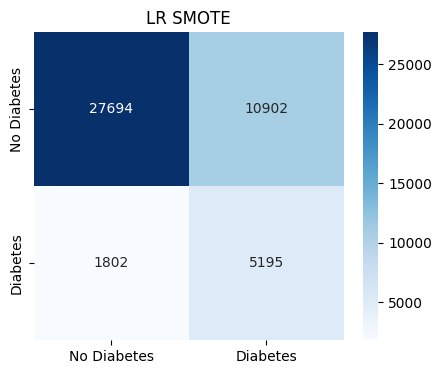

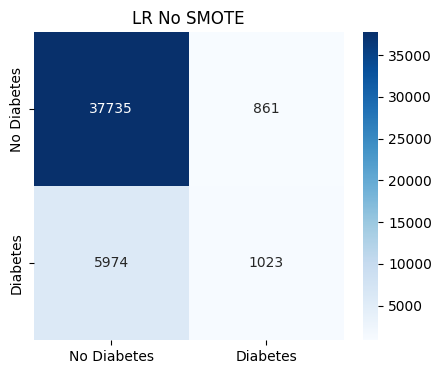

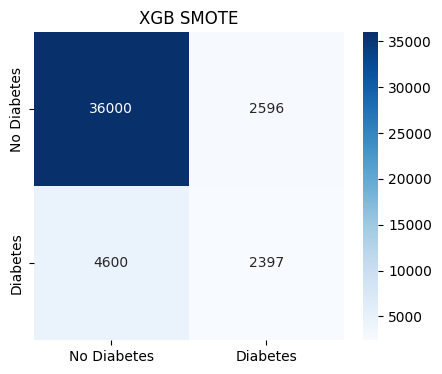

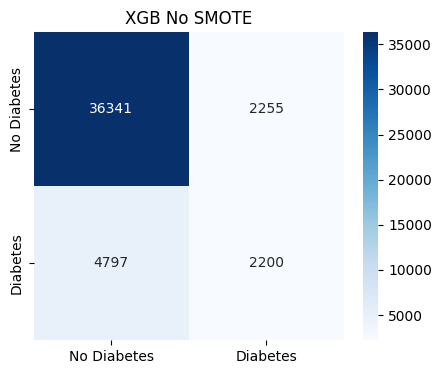

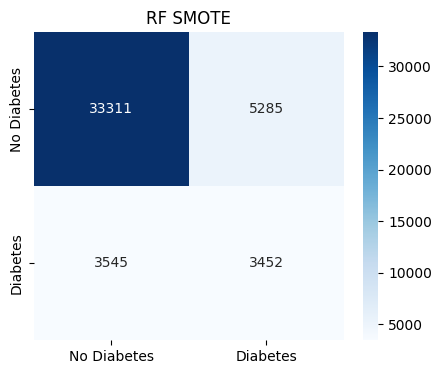

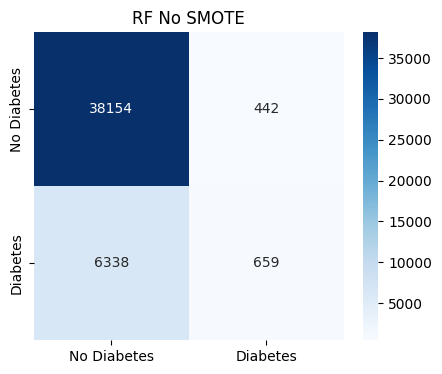

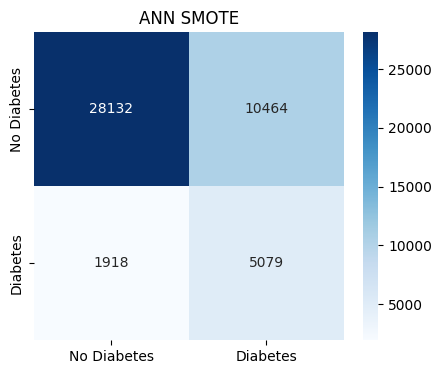

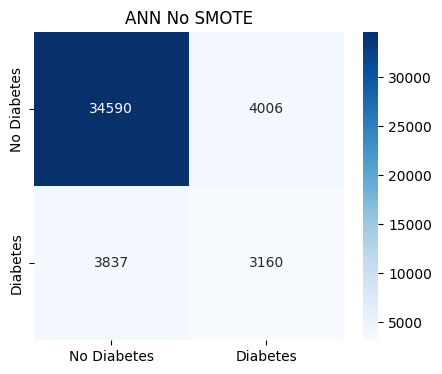

In [ ]:
def plot_cm(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Diabetes", "Diabetes"],
                yticklabels=["No Diabetes", "Diabetes"])
    plt.title(title)
    plt.show()

plot_cm(confusion_matrix(y_test, y_pred_lr_sm), "LR SMOTE")
plot_cm(confusion_matrix(y_test, y_pred_lr_orig), "LR No SMOTE")

plot_cm(confusion_matrix(y_test, y_pred_xgb_sm), "XGB SMOTE")
plot_cm(confusion_matrix(y_test, y_pred_xgb_orig), "XGB No SMOTE")

plot_cm(confusion_matrix(y_test, y_pred_rf_sm), "RF SMOTE")
plot_cm(confusion_matrix(y_test, y_pred_rf_orig), "RF No SMOTE")

plot_cm(confusion_matrix(y_test, y_pred_ann_sm), "ANN SMOTE")
plot_cm(confusion_matrix(y_test, y_pred_ann_orig), "ANN No SMOTE")